# __Walmart Dataset__ <br>
_Walmart Store Sales Prediction - Regression Problem_

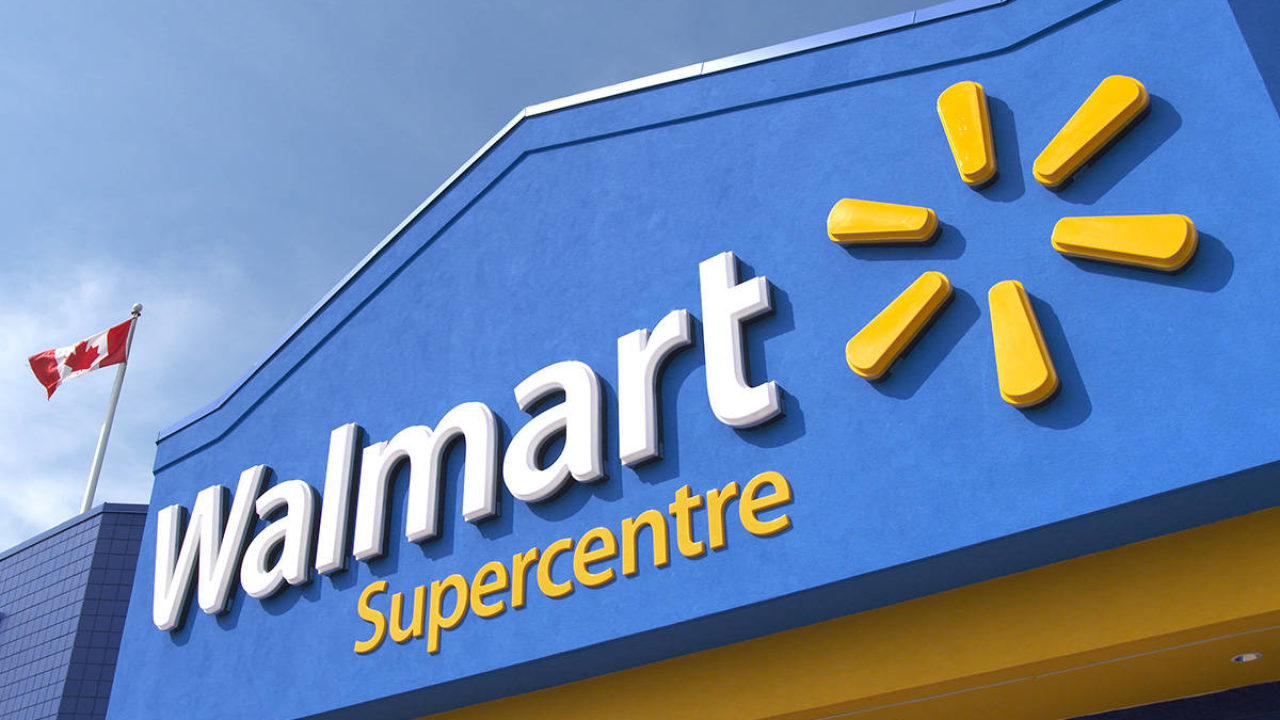

In [318]:
from IPython import display
display.Image('Walmart.jpeg')

## __Description:__ <br>
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc. <br>

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.<br>

__Acknowledgements__<br>
The dataset is taken from Kaggle. <br>

__Objective:__<br>
Understand the Dataset & cleanup (if required). <br>
Build Regression models to predict the sales w.r.t single & multiple features. <br>
Also evaluate the models & compare their respective scores like R2, RMSE, etc. <br>

### About this file
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales.
Within this file you will find the following fields:<br>


| **Field**   |     **Description** |  
|-------------|---------------------|
| Store       |  the store number | 
| Date        |  the week of sales |
| Weekly_Sales| sales for the given store   |
| Holiday_Flag| whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week | 
| Temperature | Temperature on the day of sale |
| Fuel_Price  |  Cost of fuel in the region |
| CPI         |  Prevailing consumer price index | 
| Unemployment|  Prevailing unemployment rate |
| Holiday Events| Super Bowl;Labour Day;Thanksgiving;Christmas|

## __Data Exploration__

**Step 1:** The very first step is to have a deeper look into the data:
1. Using pandas extract a dataframe called *df* from the file *walmart.csv*
2. Print the result of the method  ```name_dataframe.d_types```, in this way you print out the data types associated to each of the fields in the table
3. Run the method ```name_dataframe.head(N)``` to look at first N instances of the dataframe.
4. Use the method ```name_dataframe.describe( )``` to generate descriptive statistics that summarize each field of the dataframe

### Import the libraries

In [253]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [254]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Check the shape of the dataset

In [255]:
df.shape

(6435, 8)

### Check the datatypes of each column

In [256]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### Check for Descriptive Statistics

In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


### Check for columns

In [258]:
print(df.columns.to_list())

['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


### Convert the date column from object to datetime

In [259]:
df.Date = pd.to_datetime(df.Date)
df.Date.dtype

dtype('<M8[ns]')

In [260]:
df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
2473,18,2010-11-26,1653759.36,1,40.81,3.070,132.836933,9.331,2010,11
4251,30,2012-03-02,434080.74,0,55.83,3.360,219.811885,7.057,2012,3
6090,43,2011-09-16,618877.13,0,77.17,3.526,207.852714,10.641,2011,9
5975,42,2012-03-30,544408.14,0,67.92,4.294,130.967097,7.545,2012,3
3149,23,2010-02-26,1198709.65,0,32.68,2.753,131.686000,5.892,2010,2


### Checking for largest Sales

In [261]:
df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price']].nlargest(10,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
1905,14,2010-12-24,3818686.45,0,30.59,3.141
2763,20,2010-12-24,3766687.43,0,25.17,3.141
1333,10,2010-12-24,3749057.69,0,57.06,3.236
527,4,2011-12-23,3676388.98,0,35.92,3.103
1762,13,2010-12-24,3595903.20,0,34.90,2.846
1814,13,2011-12-23,3556766.03,0,24.76,3.186
2815,20,2011-12-23,3555371.03,0,40.19,3.389
475,4,2010-12-24,3526713.39,0,43.21,2.887
1385,10,2011-12-23,3487986.89,0,48.36,3.541
189,2,2010-12-24,3436007.68,0,49.97,2.886


In [262]:
# Store 14 has the most weekly_sales, while store 20,10,13,4 have are in top 10 twice

### Convert the numerical columns to categorical

In [263]:
# we convert the store column to categorical since each Value is unique store no
df.Store = pd.Categorical(df.Store)
df.Store.dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
                 ordered=False)

In [267]:
df['Holiday_Flag'] = pd.Categorical(df.Holiday_Flag)
df.Holiday_Flag.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

## __Exploratory Data Analysis__

In [264]:
# Print the maximum of the date column
print(df.Date.max())

# Print the minimum of the date column
print(df.Date.min())

2012-12-10 00:00:00
2010-01-10 00:00:00


In [265]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
print(df[["Temperature", "Fuel_Price", "Unemployment"]].agg([iqr,np.mean,np.median]))

        Temperature  Fuel_Price  Unemployment
iqr       27.480000    0.802000      1.731000
mean      60.663782    3.358607      7.999151
median    62.670000    3.445000      7.874000


In [266]:
# Sort sales_1_1 by date
sales_1_1 = df.sort_values('Date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1.Weekly_Sales.cumsum()

# Get the max of weekly_sales, add as cum_max_sales col
sales_1_1['max_sales'] = sales_1_1.Weekly_Sales.max()

# See the columns we calculated
sales_1_1[["Date", "Weekly_Sales", "cum_weekly_sales", "max_sales"]]

,Date,Weekly_Sales,cum_weekly_sales,max_sales
606,2010-01-10,283178.12,2.831781e+05,3818686.45
2036,2010-01-10,566945.95,8.501241e+05,3818686.45
5897,2010-01-10,481523.93,1.331648e+06,3818686.45
4610,2010-01-10,224294.39,1.555942e+06,3818686.45
5039,2010-01-10,422169.47,1.978112e+06,3818686.45
...,...,...,...,...
5860,2012-12-10,1409544.97,6.732415e+09,3818686.45
2285,2012-12-10,491817.19,6.732907e+09,3818686.45
1427,2012-12-10,1713889.11,6.734621e+09,3818686.45
3572,2012-12-10,697317.41,6.735318e+09,3818686.45


In [268]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = df[df['Holiday_Flag'] == 1].drop_duplicates(subset = 'Date')

# Print date col of holiday_dates
holiday_dates.Date

1     2010-12-02
31    2010-10-09
42    2010-11-26
47    2010-12-31
53    2011-11-02
83    2011-09-09
94    2011-11-25
99    2011-12-30
105   2012-10-02
135   2012-07-09
Name: Date, dtype: datetime64[ns]

### Analysis by store

In [269]:
Store = df.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

### Set Style 

In [270]:
plt.style.use('seaborn-darkgrid')

### Line chart to view trend across stores for Total weekly_sales column

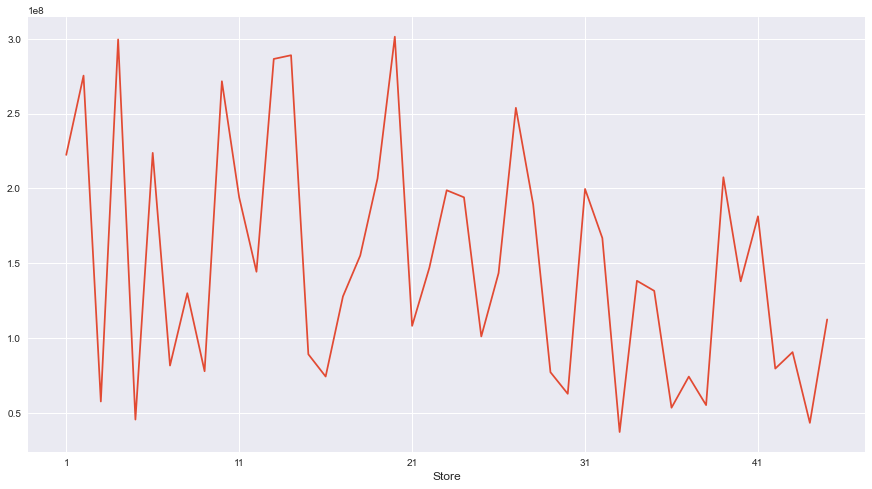

In [271]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot()
plt.show()

### Bar chart for better analysis

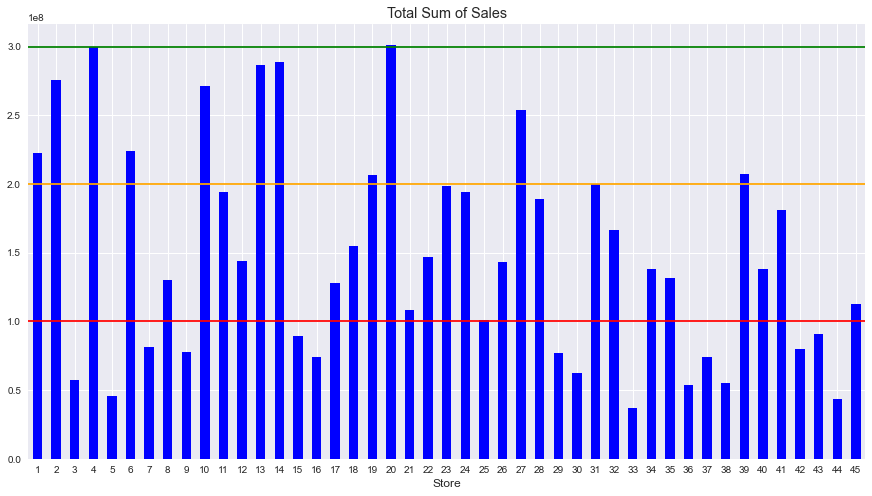

In [272]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

__A bar plot is much more conclusive and we get the following observations__
* Stores getting total sales below the redline are underperforming<br>
* Stores between red and orange are average <br>
* Stores between orange and green are performing above average<br>
* Stores touching the green line are very well performing<br>

In [273]:
# We can do the same for max Weekly sales for each store

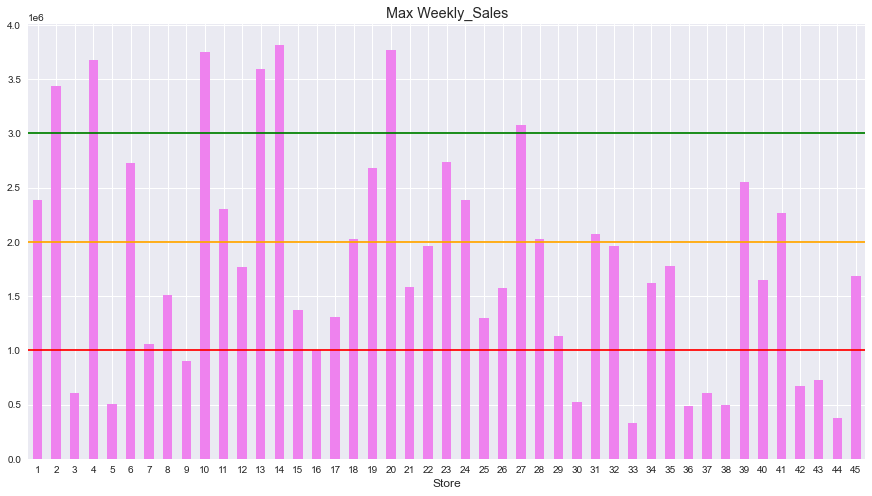

In [274]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'max')].plot(kind = 'bar',color = 'violet')
plt.xticks(rotation = 0)
plt.title('Max Weekly_Sales')
plt.axhline(y=2000000,color = 'orange')
plt.axhline(y=1000000,color = 'red')
plt.axhline(y=3000000,color = 'green')
plt.show()

__From the charts we can say that stores 4,20 are the best performing stores while 5,33,44 are the least performing__

###  Using the Holiday_flag column to check Weekly_sales

12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [275]:
# check for total values in Holiday_Flag column
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

### Aggregating Weekly sales based on store and holiday flag

In [276]:
Store_new = df.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
Store_new = Store_new.reset_index()
Store_new

Store Holiday_Flag  Weekly_Sales                          
                               mean         max           sum
0      1            0  1.546957e+06  2387950.20  2.057453e+08
1      1            1  1.665748e+06  2033320.66  1.665748e+07
2      2            0  1.914209e+06  3436007.68  2.545898e+08
3      2            1  2.079267e+06  2658725.29  2.079267e+07
4      3            0  4.000648e+05   605990.41  5.320862e+07
..   ...          ...           ...         ...           ...
85    43            1  6.359463e+05   722120.04  6.359463e+06
86    44            0  3.032536e+05   376233.89  4.033273e+07
87    44            1  2.960356e+05   338737.33  2.960356e+06
88    45            0  7.821985e+05  1682862.03  1.040324e+08
89    45            1  8.362937e+05  1182500.16  8.362937e+06

[90 rows x 5 columns]

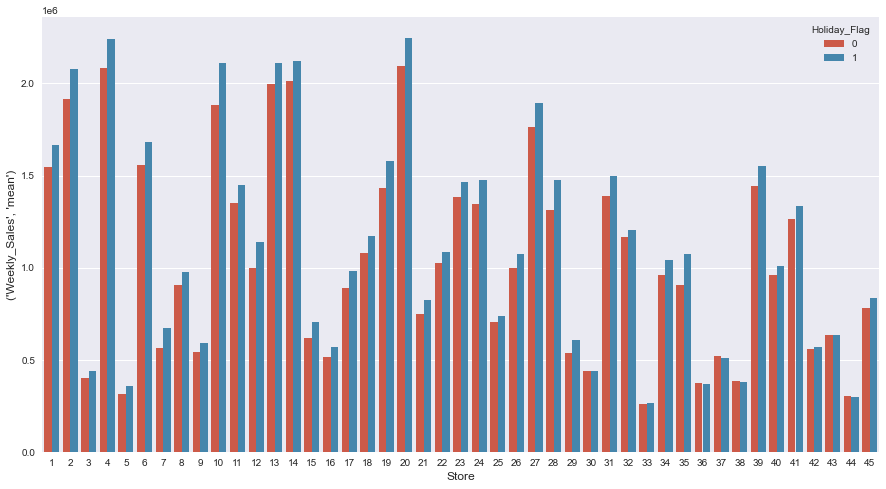

In [277]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=Store_new)
plt.show()

__Inference__: <br>
* People generally tend to spend more during holiday weeks<br>
* The average spending is more during holiday weeks than normal weeks
    

### Features vs Weekly sales

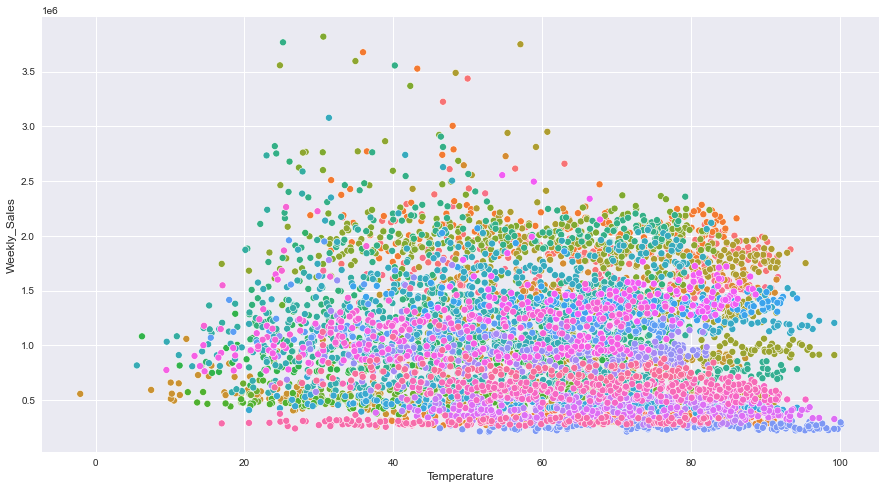

In [278]:
# Temparature vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store',data = df,legend = False)
plt.show()

In [279]:
# We can say that temperature doesn't have much impact

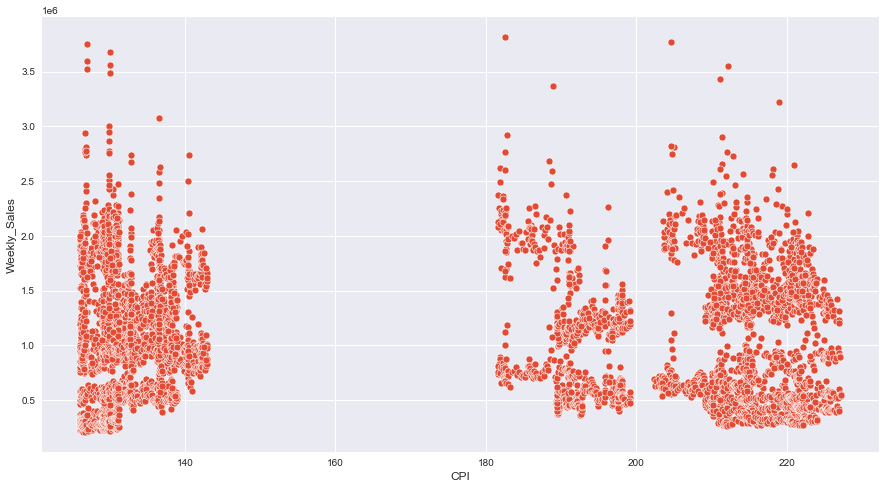

In [280]:
# CPI vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

In [281]:
# Again no significant pattern can be observed

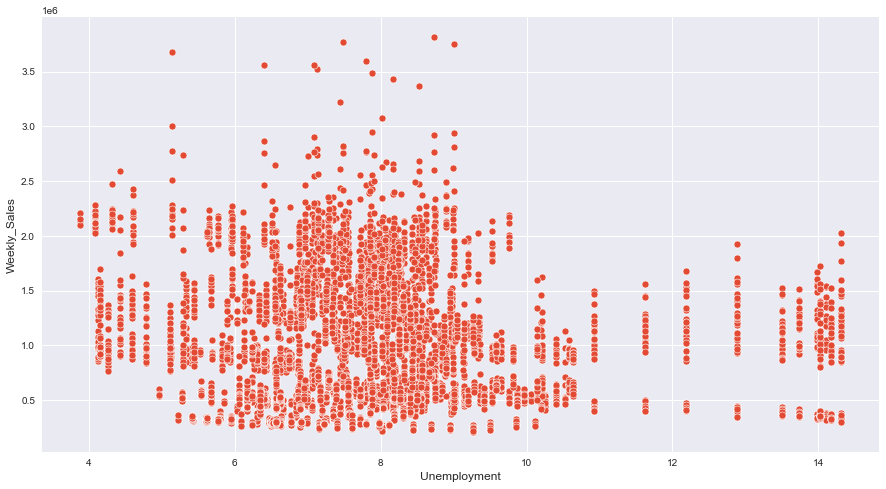

In [282]:
# Unemployment vs Week_sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

In [283]:
# Again no significant pattern can be observed

### Plotting for all features

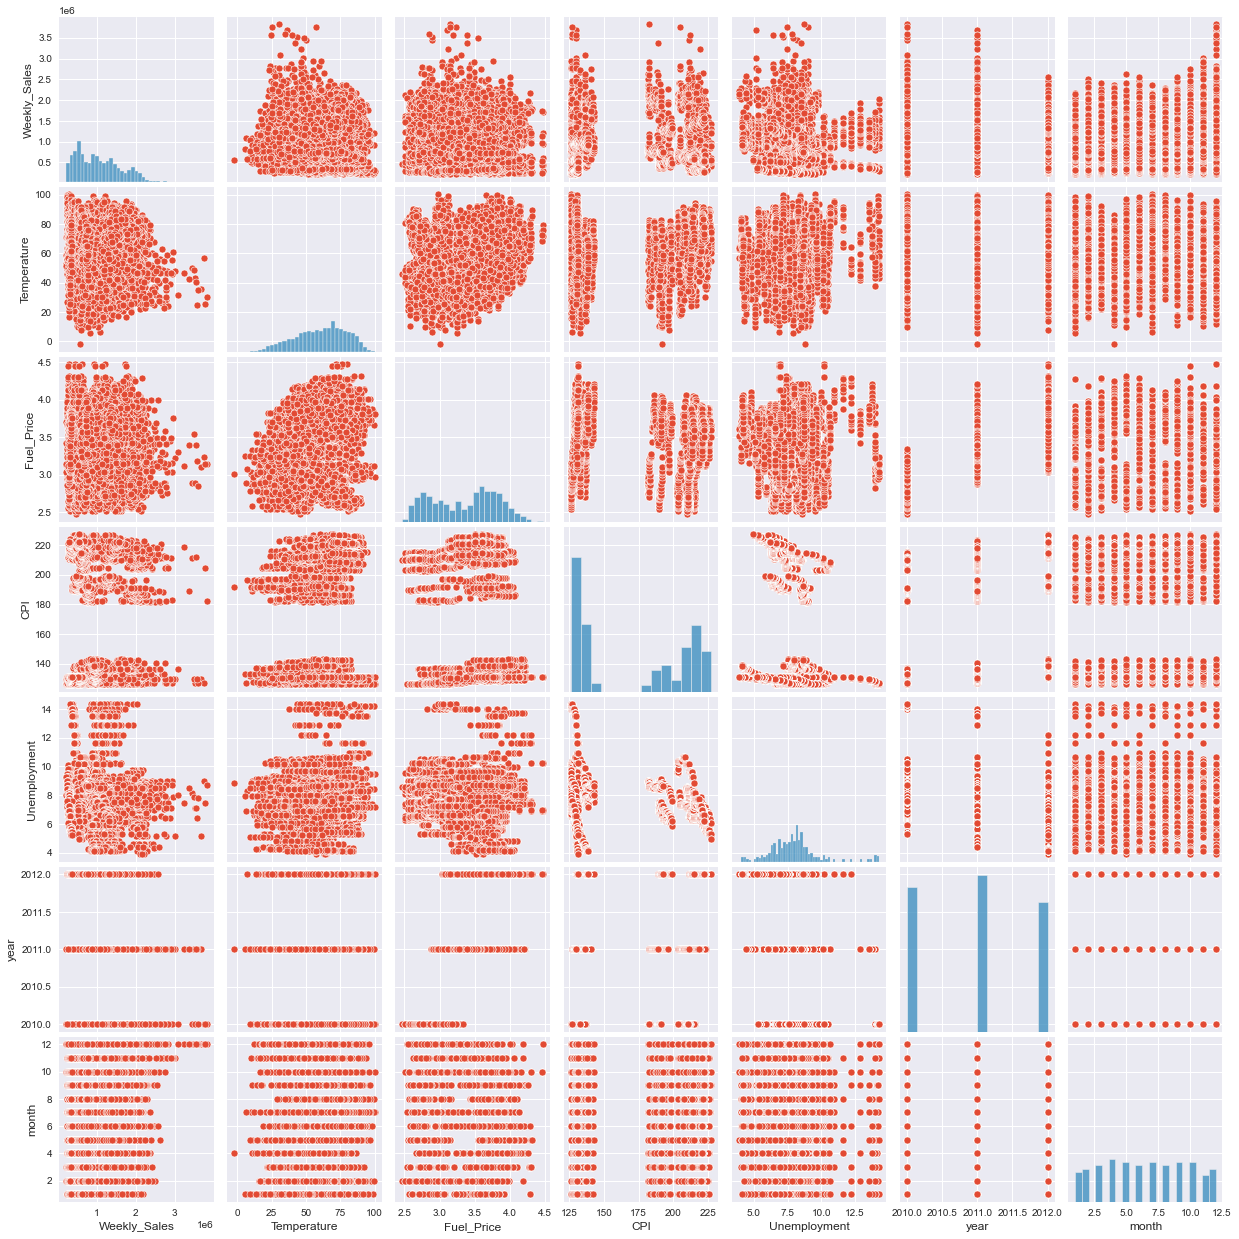

In [284]:
sns.pairplot(df)

### Check for distribution of numerical features

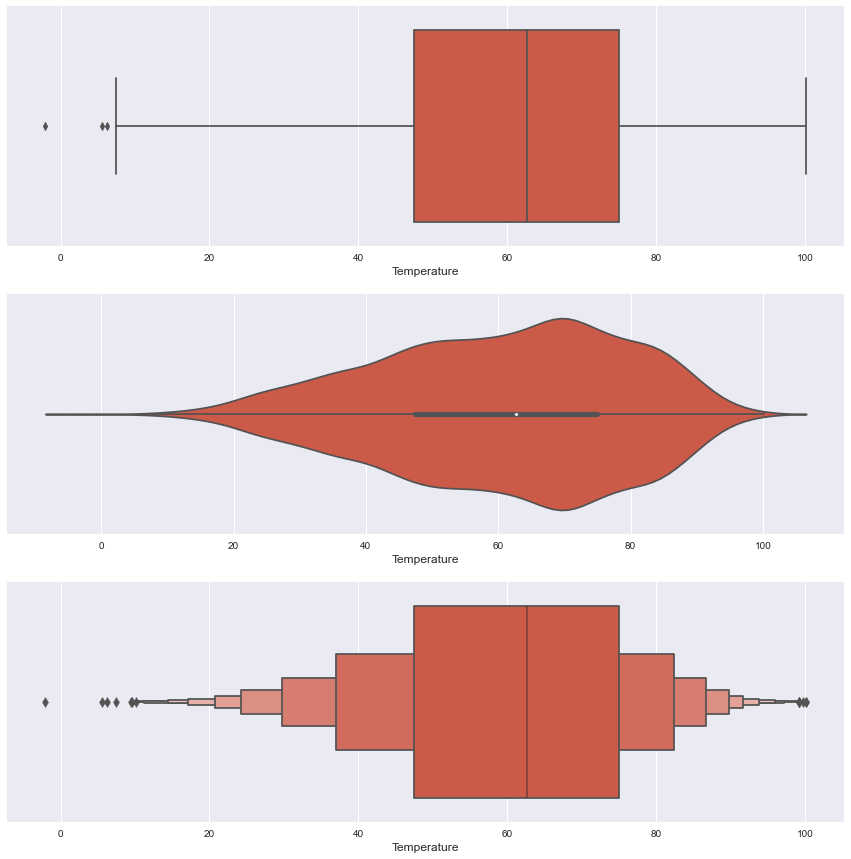

In [285]:
# Temperature
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Temperature'], ax=axs[0])
sns.violinplot(x = df['Temperature'], ax=axs[1])
sns.boxenplot(x = df['Temperature'], ax=axs[2])
plt.show()

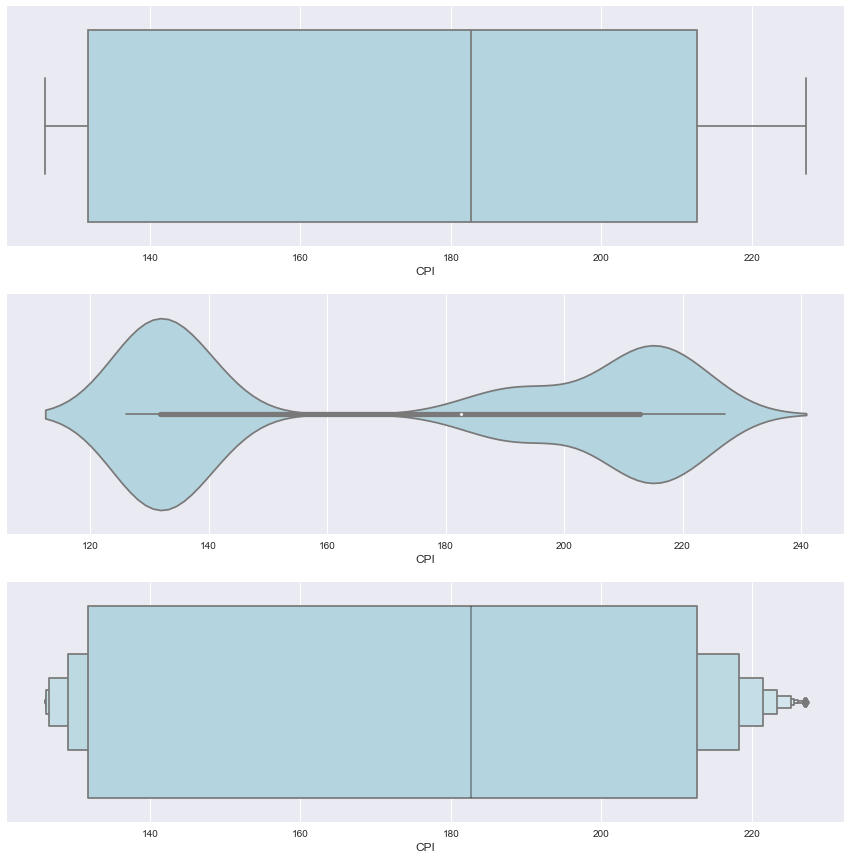

In [286]:
# CPI
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['CPI'], ax=axs[0],color='lightblue')
sns.violinplot(x = df['CPI'], ax=axs[1],color='lightblue')
sns.boxenplot(x = df['CPI'], ax=axs[2],color='lightblue')
plt.show()

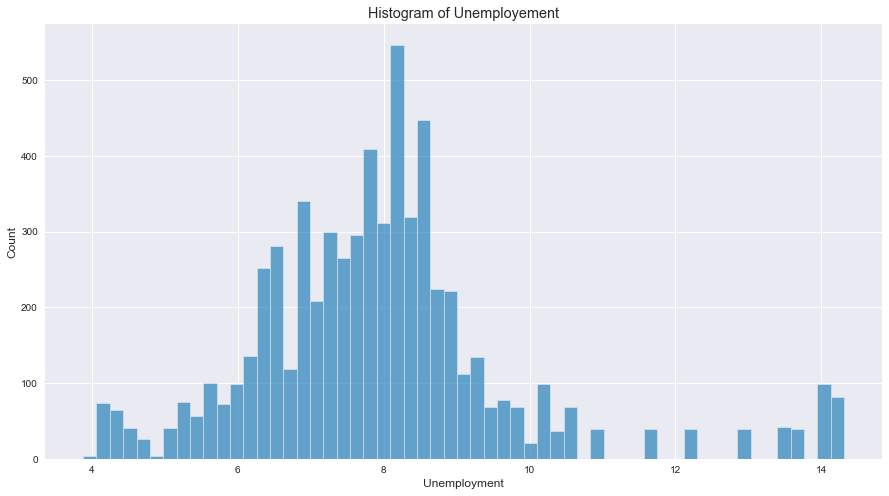

In [287]:
# Unemployement
plt.figure(figsize=(15,8))
sns.histplot(x = 'Unemployment',data = df)
plt.title("Histogram of Unemployement")
plt.show()

## __Data Preprocessing__

In [288]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   month         6435 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(5), int64(2)
memory usage: 416.6 KB


### Adding dummy variables for Categorical features

In [291]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'])
print(df_dummies.columns.to_list())

['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


## __Machine Learning__

### Using sklearn

**Step 2 - Prepare the data:**
We split our data into two sets: one data set for training and another one that we will use at the end to test our model.

1. Import the function ```train_test_split``` from ```sklearn.model_selection```
2. Split our *df* in **X** made of all features except *Date*,*Weekly_Sales* and **y** made of the feature *Weekly_Sales* 
3. Use ```train_test_split``` with a *test_size*=0.20 (20 % of inputs became the test set) in following way to obtain a train set and a test set.

    ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)```

In [292]:
X = df_dummies.drop(['Date','Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales

In [293]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [294]:
from sklearn.linear_model import LinearRegression

In [295]:
lr = LinearRegression()

#### Fit and predict the model

In [296]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#### Create a DataFrame of Actual vs Predicted values

In [297]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_new.head()

,Actual,Predicted
2436,1138800.32,1166585.0
3361,1304850.67,1345994.0
233,1769296.25,1993761.0
3667,1077640.13,1084455.0
5011,428851.99,342057.0


#### Check for actual vs predicted mean

In [298]:
print(f"{y.mean()}")
y_pred.mean()

1046964.8775617732


1059388.7055167055

#### Check for error

In [299]:
from sklearn import metrics
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error:  97293.30496503496
Mean Squared Error:  24387945906.072247
Root Mean Squared Error:  156166.4045371867


In [300]:
# variance score: 1 means perfect prediction
print(f"The variance score is: {lr.score(X_test,y_test)}")

The variance score is: 0.9242973759077429


#### rmse,rsquare and adjusted rsquare

In [301]:
# rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2

(156166.4045371867, 0.9242973759077429, 0.9236685968641933)

### Using Statsmodel

#### Importing the libraries

In [302]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

#### Checking for features to add in the model

In [303]:
print(df_dummies.columns.to_list())

['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


#### Fitting the model

In [304]:
model = smf.ols("Weekly_Sales~ Temperature + Fuel_Price + CPI + Unemployment + year + month + Store_1 + Store_2 + Store_3+ Store_4 + Store_5 + Store_6 + Store_7 + Store_8 + Store_9 + Store_10 + Store_11 + Store_12 + Store_13 + Store_14 + Store_15 + Store_16 + Store_17 + Store_18 + Store_19 + Store_20 + Store_21 + Store_22 + Store_23 + Store_24+ Store_25 + Store_26+ Store_27 + Store_28 + Store_29 + Store_30 + Store_31 + Store_32 + Store_33 + Store_34 + Store_35 + Store_36 + Store_37 + Store_38 + Store_39 + Store_40 + Store_41 + Store_42 + Store_43 + Store_44 + Store_45 + Holiday_Flag_0 + Holiday_Flag_1",data = df_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1564.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:28:19   Log-Likelihood:                -85979.
No. Observations:                6435   AIC:                         1.721e+05
Df Residuals:                    6383   BIC:                         1.724e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.333e+08   9.95e+06     13.396      0.000    1.14e+08    1.53e+08
Temperature    -1575.0273    131.578    -11.970      0.000   -1832.965   -1317.089
Fuel_Price      2.771e+04   8135.191      3.407      0.001    1.18e+04    4.37e+04
CPI             1.529e+04   1425.711     10.725      0.000    1.25e+04    1.81e+04
Unemployment   -4.742e+04   4554.739    -10.411      0.000   -5.63e+04   -3.85e+04
year           -1.015e+05   7617.870    -13.329      0.000   -1.16e+05   -8.66e+04
month           7922.6146    670.265     11.820      0.000    6608.670    9236.559
Store_1         2.789e+06   1.83e+05     15.282      0.000    2.43e+06    3.15e+06
Store_2         3.166e+06   1.83e+05     17.317      0.000    2.81e+06    3.52e+06
Store_3         1.569e+06   1.79e+05      8.757      0.000    1.22e+06    1.92e+06
Store_4         4.577e+06   2.66e+05     17.232      0.000    4.06e+06     5.1e+06
Store_5         1.483e+06   1.79e+05      8.274      0.000    1.13e+06    1.83e+06
Store_6          2.73e+06   1.79e+05     15.233      0.000    2.38e+06    3.08e+06
Store_7         2.147e+06   2.02e+05     10.638      0.000    1.75e+06    2.54e+06
Store_8         2.009e+06   1.77e+05     11.382      0.000    1.66e+06    2.36e+06
Store_9          1.65e+06   1.77e+05      9.347      0.000     1.3e+06       2e+06
Store_10        4.501e+06   2.68e+05     16.772      0.000    3.97e+06    5.03e+06
Store_11        2.525e+06   1.79e+05     14.086      0.000    2.17e+06    2.88e+06
Store_12        3.832e+06   2.77e+05     13.843      0.000    3.29e+06    4.37e+06
Store_13        4.519e+06   2.67e+05     16.946      0.000       4e+06    5.04e+06
Store_14        3.737e+06   2.08e+05     17.940      0.000    3.33e+06    4.14e+06
Store_15        3.077e+06    2.6e+05     11.844      0.000    2.57e+06    3.59e+06
Store_16        2.004e+06   1.98e+05     10.143      0.000    1.62e+06    2.39e+06
Store_17        3.376e+06   2.66e+05     12.703      0.000    2.86e+06     3.9e+06
Store_18        3.585e+06   2.62e+05     13.693      0.000    3.07e+06     4.1e+06
Store_19        3.899e+06    2.6e+05     15.008      0.000    3.39e+06    4.41e+06
Store_20        3.411e+06   1.86e+05     18.351      0.000    3.05e+06    3.78e+06
Store_21        1.997e+06   1.83e+05     10.923      0.000    1.64e+06    2.36e+06
Store_22        3.434e+06   2.56e+05     13.412      0.000    2.93e+06    3.94e+06
Store_23        3.691e+06   2.55e+05     14.461      0.000    3.19e+06    4.19e+06
Store_24        3.835e+06   2.61e+05     14.716      0.000    3.32e+06    4.35e+06
Store_25        2.005e+06   1.86e+05     10.792      0.000    1.64e+06    2.37e+06
Store_26        3.442e+06    2.6e+05     13.244      0.000    2.93e+06    3.95e+06
Store_27        4.178e+06   2.56e+05     16.351      0.000    3.68e+06    4.68e+06
Store_28    

#### Checking for Normality

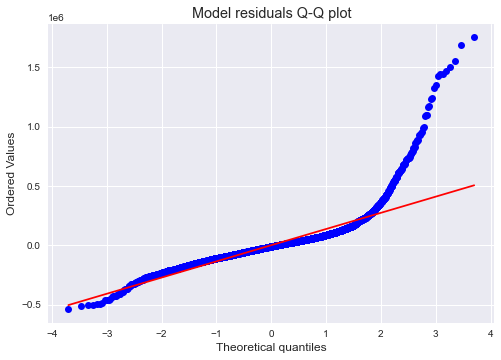

In [305]:
# check normality using q-q plot
stats.probplot(model.resid,dist = 'norm',plot = plt)
plt.title("Model residuals Q-Q plot")
plt.show()

__What is Homoskedastic?__ <br>
Homoskedastic (also spelled "homoscedastic") refers to a condition in which the variance of the residual,or <br>error term, in a regression model is constant. That is, the error term does not vary much as the value of <br>the predictor variable changes. Another way of saying this is that the variance of the data points are <br>roughly the same for all data points. This suggests a level of consistency and makes it easier to model and <br>work with the data through regression. However, the lack of homoskedasticity may suggest that the regression <br>model may need to include additional predictor variables to explain the performance of the dependent variable.

KEY TAKEAWAYS
* Homoskedasticity occurs when the variance of the error term in a regression model is constant. 
* If the variance of the error term is homoskedastic, the model was well-defined. If there is too much variance, the model may not be defined well.<br> 
* Adding additional predictor variables can help explain the performance of the dependent variable.<br>
* Oppositely, heteroskedasticity occurs when the variance of the error term is not constant.

__What Is Heteroskedasticity?__<br>
In statistics, heteroskedasticity (or heteroscedasticity) happens when the standard deviations of a predicted variable, <br>monitored over different values of an independent variable or as related to prior time periods, are non-constant. <br>With heteroskedasticity, the tell-tale sign upon visual inspection of the residual errors is that they will tend to fan out over time, as depicted in the image below.<br>

Heteroskedasticity often arises in two forms: conditional and unconditional.<br> Conditional heteroskedasticity identifies nonconstant volatility related to prior period's (e.g., daily) volatility.<br> Unconditional heteroskedasticity refers to general structural changes in volatility that are not related to prior period volatility.<br> Unconditional heteroskedasticity is used when future periods of high and low volatility can be identified.<br>
Source: _Investopedia_

In [306]:
# check for homoscedascity and heteroscedasticity
name = ['Lagrange multiplier statistic','p-value','f-value','f p-value']
test = sms.het_breuschpagan(model.resid,model.model.exog)
lzip(name,test)

[('Lagrange multiplier statistic', 641.618044116235),
 ('p-value', 5.290526311967851e-102),
 ('f-value', 13.861143990459349),
 ('f p-value', 2.0700769085568856e-109)]

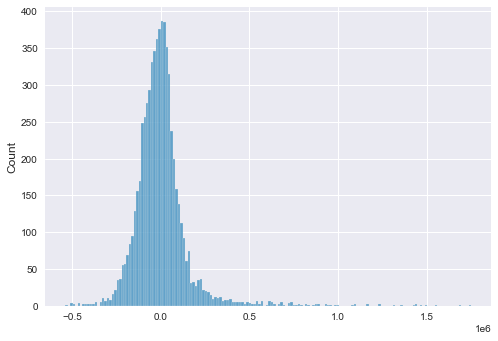

In [307]:
sns.histplot(model.resid);

### Using Polynomial Features

The dataset contains a lot of features that can be used to build the model. 

\begin{equation}
 \hat{y} = W_0 + W_1\ x_{Store} + W_2\ x_{Holiday Flag} + W_3\ x_{Temperature} + W_4\ x_{Fuel Price} +W_5\ x_{CPI}+W_5\ x_{Unemployment}
\end{equation}

We need to use *numpy* library and

<code>from sklearn.preprocessing import PolynomialFeatures<\code>

we define a function called *prepare_data(name_dataframe)* which does the following:
1. extract the above features from the dataframe and assign to a variable
2. transform our variable in numpy array <code>np.array(variable)</code>
3. and then add a columns of ones (for the variable of $W_0$) to the dummy variable
4. return our variable
    
We then apply our function to *X_train* and *X_test* to obtain *input_train1* and *input_test1* respectively
Then we create also *output_train* and *output_test* moving to numpy array *y_train1* and *y_test1* respectively. Test data will be used later in the code



In [309]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    variable = X.copy()
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

input_train1 = prepare_data(X_train)
input_test1 = prepare_data(X_test)
output_train1 = np.array(y)
output_test1 = np.array(y)

**Step 3 - Training**

Here we define a class called *my_linear_regression* which initializes with *__init__(self)* as empty the properties self.X_train, self.y_train and self.weights. Then we define the method *fit()* of the class which needs as parameters a matrix (X) and an array (y) with the outputs. With those parameters the class initializes self.x_train, self.y_train using the matrix and the array respectively and self.weigths using the formula of the linear regression: $$\hat{W}=(𝑿^𝑇\ 𝑿)^{−1}𝑿^𝑇\ 𝒚$$

We are using the function *np.linalg.solve*($𝑿^𝑇\ 𝑿,𝑿^𝑇\ 𝒚$) to obtain $\hat{W}$ because it is more efficient than matrix inversion and it avoids numerical inestabilities.

The last function in the object *my_linear_regression* is the function *predict()*. Given the weights obtained through fit, this method estimates new y values using the input matrix X_test: 

<code>self.y_hat=np.sum(X*self.weights,axis=1)<\code>

The function also receives an array y with the true y values to compute the mean square error (MSE) using the formula : $$MSE = \dfrac{1}{N}\sum_{i=1}^{N}(y_i -\hat{y}_i)^2$$, where $y_i$ is y_test[i]. 
    
**Implement the MSE.**

In [310]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,X_test,y_test) : # method of the object that can be used
        self.y_hat=np.sum(X_test*self.weights,axis=1)
        
        self.MSE= np.square(np.subtract(y_test,self.y_hat)).mean() 
        
        return self.y_hat, self.MSE

#### Fit and predict the model

In [311]:
model_1 = my_linear_regression()
k = model_1.fit(input_train1,output_train1)
model_1.y_hat,model_1.MSE = model_1.predict(input_train1,output_train1)

In [312]:
model_1.y_hat

array([1564412.69687073, 1651918.99525344, 1545733.94441979, ...,
        835832.96020792,  816033.46301283,  809538.18833365])

In [313]:
model_1.MSE

23599698927.614902

In [314]:
model_1.weights[1:]

array([-1.57502728e+03,  2.77125637e+04,  1.52909184e+04, -4.74194043e+04,
       -1.01539366e+05,  7.92261460e+03, -2.42660992e+08, -2.42284650e+08,
       -2.43881087e+08, -2.40873881e+08, -2.43967560e+08, -2.42720717e+08,
       -2.43303534e+08, -2.43441274e+08, -2.43800245e+08, -2.40949661e+08,
       -2.42925759e+08, -2.41618636e+08, -2.40931187e+08, -2.41713777e+08,
       -2.42373430e+08, -2.43446488e+08, -2.42074193e+08, -2.41865889e+08,
       -2.41551017e+08, -2.42039239e+08, -2.43453338e+08, -2.42016085e+08,
       -2.41759618e+08, -2.41615153e+08, -2.43445413e+08, -2.42008812e+08,
       -2.41272559e+08, -2.41304116e+08, -2.42362847e+08, -2.43770828e+08,
       -2.42813506e+08, -2.42687065e+08, -2.42574087e+08, -2.41819470e+08,
       -2.42086286e+08, -2.43806170e+08, -2.43661211e+08, -2.42241906e+08,
       -2.42730330e+08, -2.42187135e+08, -2.42668796e+08, -2.42292682e+08,
       -2.43345482e+08, -2.42644681e+08, -2.42948774e+08,  6.36739052e+07,
        6.36984036e+07])

#### Check for rmse,rsquare,adjusted rsquare

In [315]:
# rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(output_test1, model_1.y_hat))

from sklearn.metrics import r2_score
r2 = r2_score(output_test1, model_1.y_hat)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(model_1.weights)-1)*(1 - r2)

rmse, r2, adj_r2

(153621.93504709835, 0.9258943508670378, 0.9252671243696742)

Conclusion: All models have pretty much similar Rsquare and Adjusted Rsquare

In [316]:
final_df = pd.DataFrame({'Model':['scikitlearn','statsmodel','Polynomial features'],
                         'R-Square':[0.924,0.926,0.926],'Adjusted R-Square':[0.924,0.925,0.925]})
final_df

,Model,R-Square,Adjusted R-Square
0,scikitlearn,0.924,0.924
1,statsmodel,0.926,0.925
2,Polynomial features,0.926,0.925


__What can be improved__:<br>
* Consider the date feature
* Do some more exploratory data analysis with other features like CPI,temperature
* Run ridge regression and linear regression with Tensorflow or any other model to compare results
* Using PCA to reduce the dimensions and check for the performance.
